# <center>Elements of Statistics and Econometrics</center>
### <center>Assignment 3</center>
### <center>Illia Kachko</center>

#### __Problem 4: Linear regression analysis__

The overall objective is to analyze the service usage using the long distance calls last
month as the dependent variables and the remaining variables as explanatory.

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

In [6]:
FILE_NAME = 'telco.txt'

df = pd.read_csv(FILE_NAME, sep='\t')
df.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
1,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes
3,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No
4,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes
5,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No


1. Have a closer look at the definitions of the variables and analyze which of them might require a separate treatment. Consider for example the variable __ed__. There are two possibilities how the variable __ed__ can be included into the model (one with dummy variables, the other one without dummies). Think about these two approaches and suggest which approach is more appropriate. Motivate your decision.

_Closer treatment require text categorical variables, which should be decoded into integer form, so it can be suitable for model_

_Those are:_
1. **marital**
2. **ed**
3. **retire**
4. **gender**
5. **churn**

_We can use different approaches to transform those. I've chosen **Label Encoding** and **Dummy Variables**_

### Label Encoding (Only for _**ed**_)

In [11]:
ed_to_code = {ed:i for i, ed in enumerate(df['ed'].unique())}
code_to_df = {i:ed for i, ed in enumerate(df['ed'].unique())}
df['ed_code'] = df['ed'].map(lambda x: ed_to_code[x])
df.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn,ed_code
1,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes,0
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes,1
3,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No,2
4,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes,3
5,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No,2


In [12]:
ed_code = df['ed_code']
df.drop(['ed_code'], axis=1, inplace=True)

### Dummy Variables (for every categorical variables)

In [13]:
dummy = pd.get_dummies(df['ed'])
dummy.head()

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0


In [14]:
df = pd.concat([dummy, df], axis=1).drop(['ed'], axis=1)
df.head()

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,age,marital,address,income,employ,retire,gender,longmon,wiremon,churn
1,1,0,0,0,0,13,44,Married,9,64,5,No,Male,3.70,0.0,Yes
2,0,0,0,1,0,11,33,Married,7,136,5,No,Male,4.40,35.7,Yes
3,0,1,0,0,0,68,52,Married,24,116,29,No,Female,18.15,0.0,No
4,0,0,1,0,0,33,33,Unmarried,12,33,0,No,Female,9.45,0.0,Yes
5,0,1,0,0,0,23,30,Married,9,30,2,No,Male,6.30,0.0,No


Let's encode every categorical feature

In [15]:
marital_to_code = {marital:i for i, marital in enumerate(df['marital'].unique())}
gender_to_code = {gender:i for i, gender in enumerate(df['gender'].unique())}
retire_to_code = {retire:i for i, retire in enumerate(df['retire'].unique())}
churn_to_code = {churn:i for i, churn in enumerate(df['churn'].unique())}

df['marital_code'] = df['marital'].map(lambda x: marital_to_code[x])
df.drop('marital', axis=1, inplace=True)

df['gender_code'] = df['gender'].map(lambda x: gender_to_code[x])
df.drop('gender', axis=1, inplace=True)

df['retire_code'] = df['retire'].map(lambda x: retire_to_code[x])
df.drop('retire', axis=1, inplace=True)

df['churn_code'] = df['churn'].map(lambda x: churn_to_code[x])
df.drop('churn', axis=1, inplace=True)

df.head()

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,age,address,income,employ,longmon,wiremon,marital_code,gender_code,retire_code,churn_code
1,1,0,0,0,0,13,44,9,64,5,3.70,0.0,0,0,0,0
2,0,0,0,1,0,11,33,7,136,5,4.40,35.7,0,0,0,0
3,0,1,0,0,0,68,52,24,116,29,18.15,0.0,0,1,0,1
4,0,0,1,0,0,33,33,12,33,0,9.45,0.0,1,1,0,0
5,0,1,0,0,0,23,30,9,30,2,6.30,0.0,0,0,0,1


2. Consider now the dependent variable and the interval (metric) scaled explanatory variables. Plot these data and decide if you wish to transform these $x$-variables and if there is a need to transform the $y$ variable. You can also use some measure of skewness to decide about $y$. The variable __wiremon__ shows a very specific pattern.
How would you take it into account?

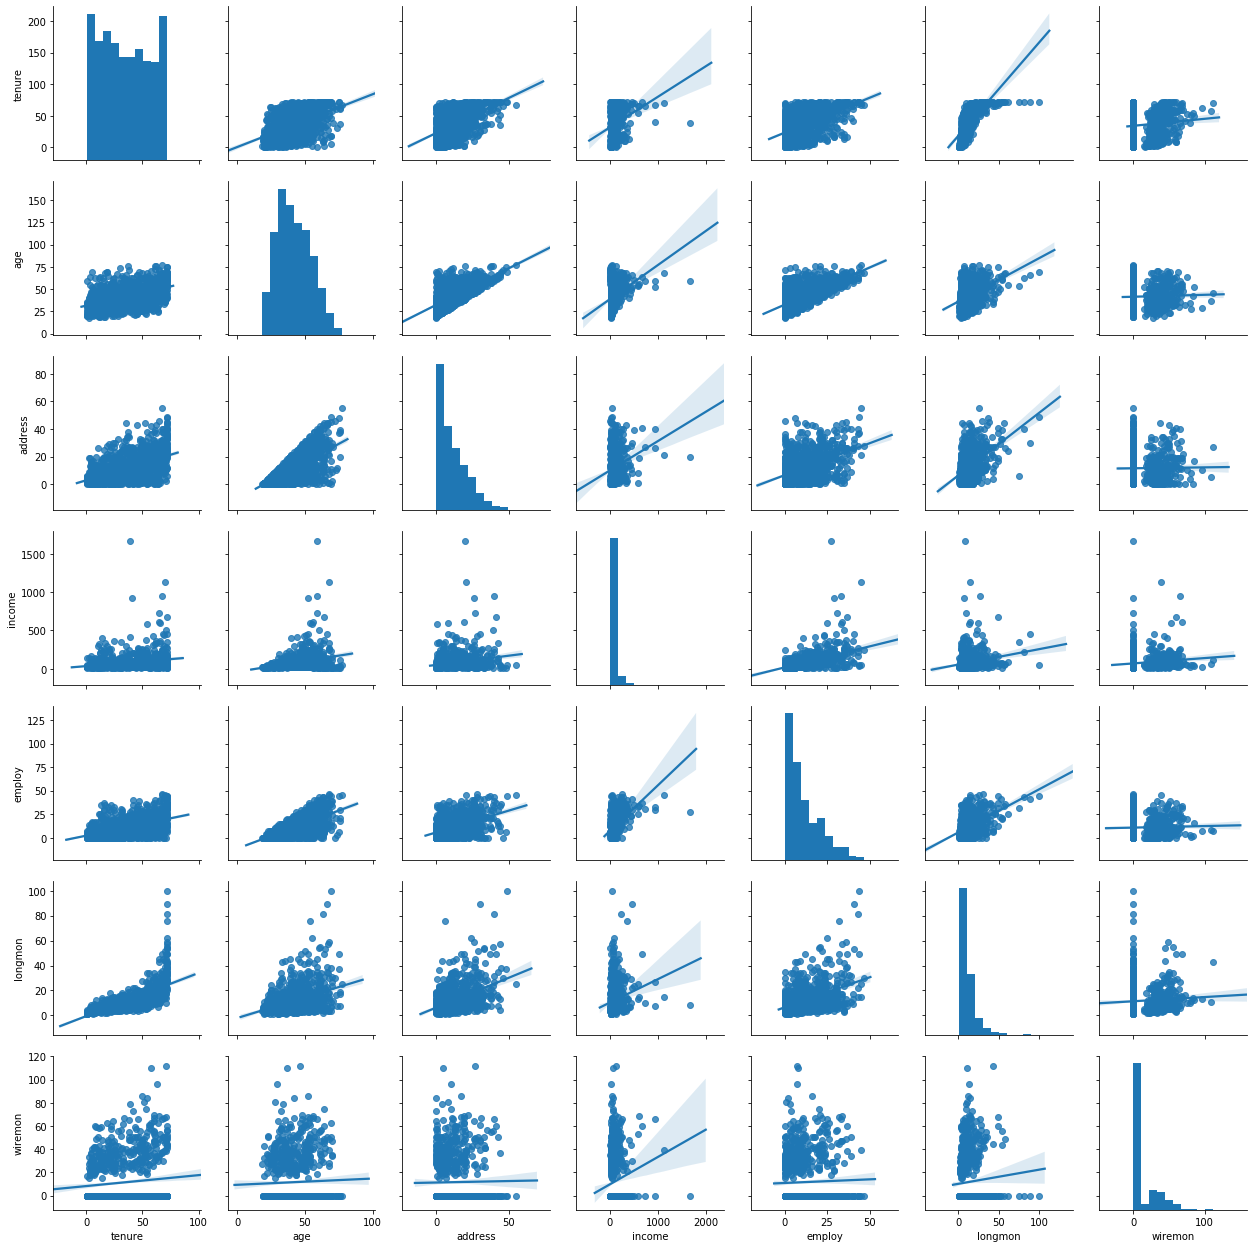

In [16]:
sns.pairplot(df, vars=['tenure', 'age', 'address', 'income', 'employ', 'longmon', 'wiremon'], kind='reg')

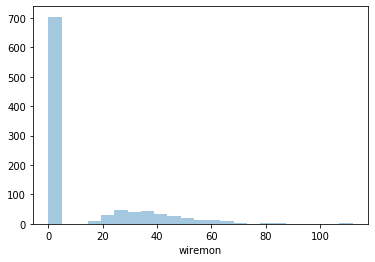

In [102]:
sns.distplot(df['wiremon'], kde=False);

_Variable **wiremon** contains many zeros. We can conclude from this, that there are many people, who does not use mobile internet. In my opinion, we should try to fit regression line without **wiremon**, because so many outilers will have bad impact on model._

**Scale:**
_Despite most of the variables are nearly in the same scale $\approx [0; 200]$, we have a variable **income**, that have wider range $\approx [0; 1700]$_.

Let's use min-max transformation for all scale:

$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

For **longmon** I'm going to use **log** transformation:

$$g(x) = log(x)$$

In [19]:
normalized_df = (df-df.min())/(df.max()-df.min())
normalized_df['ed_code'] = ed_code
normalized_df['longmon'] = np.log(df['longmon'])
normalized_df.head()

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,age,address,income,employ,longmon,wiremon,marital_code,gender_code,retire_code,churn_code,ed_code
1,1.0,0.0,0.0,0.0,0.0,0.169014,0.440678,0.163636,0.033153,0.106383,1.308333,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.140845,0.254237,0.127273,0.076552,0.106383,1.481605,0.318892,0.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.943662,0.576271,0.436364,0.064497,0.617021,2.898671,0.000000,0.0,1.0,0.0,1.0,2
4,0.0,0.0,1.0,0.0,0.0,0.450704,0.254237,0.218182,0.014467,0.000000,2.246015,0.000000,1.0,1.0,0.0,0.0,3
5,0.0,1.0,0.0,0.0,0.0,0.309859,0.203390,0.163636,0.012658,0.042553,1.840550,0.000000,0.0,0.0,0.0,1.0,2


There are many observations, where wiremon has 0 value. We can clue, that many people does not use any internet traffic.

3. After making up your decision about the above two problems run a simple linear regression. Pick up one of the regressors. Write down the corresponding hypothesis of the $t$-test. Provide the formula for the test statistics, explain the components of the formula and give the values for this components. Evaluate the goodness of the model. Explain in your own words the difference between $R^2$ and adjusted $R^2$.

_I am going to pick **tenure** as regressor and **longmon** as dependent variable._

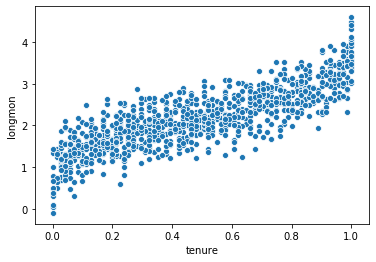

In [20]:
sns.scatterplot(data=normalized_df, x='tenure', y='longmon')

/Users/ilyakachko/.vcub/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


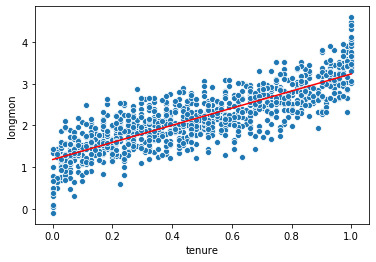

In [21]:
def predict(w, params):
    return params @ w.T

X = sm.add_constant(normalized_df['tenure'])
y = normalized_df['longmon']

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

xx = np.linspace(0, 1, 20)
yy = predict(sm.add_constant(xx), model.params)

sns.scatterplot(data=normalized_df, x='tenure', y='longmon')
plt.plot(xx, yy, c='r')
plt.show();

_To evaluate goodness of model, we can use several criterions:_

_**RSS = $\sum_{i=1}^{N} (y_i - \hat{y_i})^2$ - residual sum of squares**_

_**ESS = $\sum_{i=1}^{N} (\hat{y_i} - \bar{y})^2$ - explained sum of squares**_

_**TSS = $\sum_{i=1}^{N} (y_i - \bar{y})^2$ - total sum of squares**_

_**TSS = RSS + ESS**_

In [22]:
def evaluate_goodness(y_true, y_predicted):
    y_mean = np.mean(y_true)
    RSS = np.sum([(y_predicted - y_true)**2])
    ESS = np.sum([(y_predicted - y_mean)**2])
    TSS = RSS + ESS
    return TSS, RSS, ESS

TSS, RSS, ESS = evaluate_goodness(y_true=y, y_predicted=model.predict(X))
print('TSS = {:.2f}'.format(TSS))
print('RSS = {:.2f}'.format(RSS))
print('ESS = {:.2f}'.format(ESS))

TSS = 539.03
RSS = 158.30
ESS = 380.73


_The coefficient of determination $R^2$ is defined by:_

$$R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{N} (y_i - \bar{y_i})^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}$$

$$0 < R^2 < 1$$

In [23]:
R_2 = 1 - RSS/TSS
print('R^2 = {:2f}'.format(R_2))

R^2 = 0.706324


_Adjusted $R^2$_

$$R^2_{adj} = 1 - \frac{RSS/(N - K - 1)}{TSS/(N - 1)}$$

_Cons of $R^2$_
- $R^2$ cannot determine whether the coefficient estimates and predictions are biased
- $R^2$ does not indicate whether a regression model is adequate.

In [24]:
print('R^2 adjusted = {:2f}'.format(model.rsquared_adj))

R^2 adjusted = 0.706030


4. Compute manually the predicted values from the above regression and the residuals.

Make two plots: **residuals** vs. **predicted $y$'s** and **predicted $y$'s** vs. **true $y$'s**. What do you expect in both cases and why? Do the obtained figures support your expectations?

In [25]:
residuals = y - y_pred

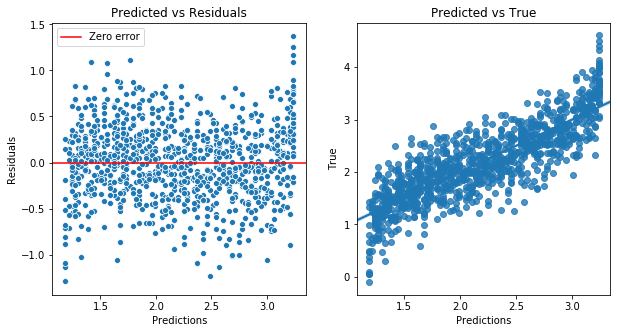

In [103]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(y_pred, residuals, ax=axs[0])
axs[0].set_title('Predicted vs Residuals')
axs[0].set_xlabel('Predictions')
axs[0].set_ylabel('Residuals')
axs[0].axhline(0, c='r', label='Zero error')
axs[0].legend();

sns.regplot(y_pred, y, ax=axs[1])
axs[1].set_title('Predicted vs True')
axs[1].set_xlabel('Predictions')
axs[1].set_ylabel('True')

plt.show();

5. If you wish to argue that education is insignificant and use the model with dummies than you have to check the simultaneous insignificance of all dummies which stem from the factor variable __ed__. Run a test for general linear hypothesis and conclude about the significance of __ed__. Write down the matrix and the vector needed in the hypothesis.

$$H_0\space : X \beta - y = 0 \qquad H_1: \space X \beta - y \neq 0$$

I do not argue, that education is significant :)))))

6. Provide an economic interpretation for the parameters of __address__, __ed__, and __retire__. Neglect the possible insignificance and keep in mind possible transformations of the variables.

In [68]:
y = normalized_df['longmon']
X = normalized_df.loc[:, normalized_df.columns != 'longmon']

model_all = sm.OLS(y, X).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.4
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          2.01e-258
Time:                        22:21:52   Log-Likelihood:                -478.43
No. Observations:                1000   AIC:                             986.9
Df Residuals:                     985   BIC:                             1060.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
College degree                   1.2919      0.045     28.676      0.000       1.203       1.380
Did not complete high school     0.3664      0.031     11.861      0.000       0.306       0.427
High school degree               0.0689      0.021      3.285      0.001       0.028       0.110
Post-undergraduate degree        0.7941      0.055     14.502      0.000       0.687       0.902
Some college                    -0.3343      0.022    -15.158      0.000      -0.378      -0.291
tenure                           1.9363      0.056     34.736      0.000       1.827       2.046
age                             -0.1493      0.098     -1.525      0.128      -0.342       0.043
address                          0.2083      0.096      2.181      0.029       0.021       0.396
income                          -0.1407      0.246     -0.573      0.567      -0.623       0.342
employ                           0.1678      0.095      1.774      0.076      -0.018       0.353
wiremon                         -0.0086      0.076     -0.114      0.910      -0.158       0.141
marital_code                    -0.0696      0.026     -2.721      0.007      -0.120      -0.019
gender_code                     -0.0347      0.025     -1.382      0.167      -0.084       0.015
retire_code                      0.1984      0.069      2.891      0.004       0.064       0.333
churn_code                       0.0388      0.031      1.256      0.209      -0.022       0.099
ed_code                          0.3963      0.013     29.804      0.000       0.370       0.422
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                2.129
Skew:                          -0.050   Prob(JB):                        0.345
Kurtosis:                       3.203   Cond. No.                     4.66e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

_p-values of **address**, **all dummy variables of ed**, **retire** are $< 0.05$. That shows the significant of those variables._

7. Compute the $95\%$ confidence intervals for the parameters of __address__ and __income__ and provide its economic meaning. Relate the CIs to the tests of significance, i.e. how would you use these intervals to decide about the significance of the corresponding explanatory variables? The CIs are computed relying on the assumption, that the residuals follow normal distribution. Is this assumption fulflled? Run an appropriate goodness-of-fit test.

In [100]:
t_25, t_75 = model_all.conf_int()[0], model_all.conf_int()[1]
t_25_addr, t_75_addr = t_25['address'], t_75['address']
t_25_income, t_75_income = t_25['income'], t_75['income']

print('95% CI for address: {:.2f}, {:.2f}'.format(t_25_addr, t_75_addr))
print('95% CI for income: {:.2f}, {:.2f}'.format(t_25_income, t_75_income))

95% CI for address: 0.02, 0.40
95% CI for income: -0.62, 0.34


_Address has positive CI. This means, that **address** with some confidence, time spent at one house increases amount of long distance calls (**longmon**)_

Text(0, 0.5, 'longmon')

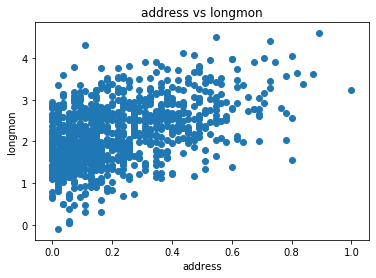

In [79]:
plt.scatter(normalized_df['address'], normalized_df['longmon'])
plt.title('address vs longmon')
plt.xlabel('address')
plt.ylabel('longmon')

Text(0, 0.5, 'longmon')

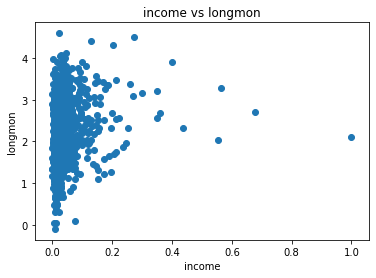

In [76]:
plt.scatter(normalized_df['income'], normalized_df['longmon'])
plt.title('income vs longmon')
plt.xlabel('income')
plt.ylabel('longmon')

8. Many of the variable appear insignificant and we should find the smallest model, which still has a good explanatory power. Choose this model using stepwise model selection (either based on the tests for $R^2$ or using AIC/BIC). Pick up the last step of the model selection procedure and explain in details how the method/approach works (or is implemented in your software). Work with this model in all the remaining steps.

_I've chosen **R**ecursive **F**orward **E**limination method. At first iteration, the estimator is trained on the initial set of features and the importance of each feature is obtained through a importance coef. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached._

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = normalized_df['longmon']
X = normalized_df.loc[:, normalized_df.columns != 'longmon']

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X, y)

ranking = selector.ranking_
selected_columns = X.columns[np.where(ranking == 1)]
print('Selected columns: ', selected_columns)
best_X = normalized_df[selected_columns]
best_X.head()

Selected columns:  Index(['College degree', 'Did not complete high school', 'High school degree',
       'Post-undergraduate degree', 'Some college', 'tenure', 'address',
       'income', 'retire_code', 'ed_code'],
      dtype='object')


,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,address,income,retire_code,ed_code
1,1.0,0.0,0.0,0.0,0.0,0.169014,0.163636,0.033153,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.140845,0.127273,0.076552,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.943662,0.436364,0.064497,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.450704,0.218182,0.014467,0.0,3
5,0.0,1.0,0.0,0.0,0.0,0.309859,0.163636,0.012658,0.0,2


In [227]:
model = sm.OLS(y, best_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     307.9
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.56e-262
Time:                        03:44:42   Log-Likelihood:                -485.67
No. Observations:                1000   AIC:                             989.3
Df Residuals:                     991   BIC:                             1034.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
College degree                   1.2175      0.032     37.706      0.000       1.154       1.281
Did not complete high school     0.3558      0.028     12.834      0.000       0.301       0.410
High school degree               0.0687      0.021      3.277      0.001       0.028       0.110
Post-undergraduate degree        0.7346      0.049     14.888      0.000       0.638       0.831
Some college                    -0.3194      0.020    -15.876      0.000      -0.359      -0.280
tenure                           1.9999      0.050     40.380      0.000       1.903       2.097
address                          0.1459      0.084      1.738      0.083      -0.019       0.311
income                          -0.0519      0.206     -0.251      0.802      -0.457       0.353
retire_code                      0.1708      0.063      2.721      0.007       0.048       0.294
ed_code                          0.3750      0.008     44.717      0.000       0.359       0.391
==============================================================================
Omnibus:                        2.753   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.848
Skew:                          -0.051   Prob(JB):                        0.241
Kurtosis:                       3.241   Cond. No.                     5.38e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

9. Sometimes data contains outliers which induces bias in the parameter estimates. Check for outliers using Cook's distance and leverage. Have a closer look at the observation with the highest leverage (regardless if it is classified as an outlier or not). What makes this observation so outstanding (you may have a look at Box-plots for interval scaled variables or at the frequencies for binary/ordinal variables?

/Users/ilyakachko/.vcub/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


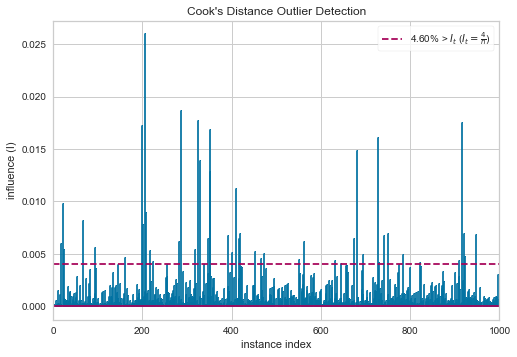

In [228]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(best_X, y)
visualizer.show()

In [231]:
influence = model.get_influence()

leverage = influence.hat_matrix_diag

cooks_d = influence.cooks_distance

best_X[leverage == np.max(leverage)]

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,address,income,retire_code,ed_code
410,1.0,0.0,0.0,0.0,0.0,0.535211,0.363636,1.0,0.0,0


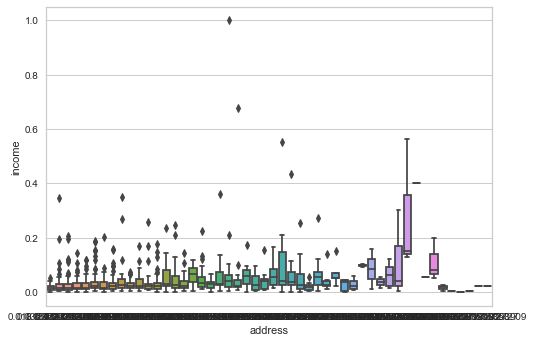

In [233]:
ax = sns.boxplot(x='address', y='income', data=best_X)

10. Frequently data is missing. Pick up 5 rows in the data set and delete the value for __address__. Implement at least two approaches to fill in these values. Write down the corresponding formulas/model and give motivation for your approach. If you use standard routines then check how exactly the data imputation is implemented. How would you proceed if the value of the binary variable __retire__ is missing? Implementation is not required.

In [245]:
copied_df = best_X.copy()

In [246]:
copied_df.loc[:5, 'address'] = np.nan
copied_df.head(10)

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,address,income,retire_code,ed_code
1,1.0,0.0,0.0,0.0,0.0,0.169014,NaN,0.033153,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.140845,NaN,0.076552,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.943662,NaN,0.064497,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.450704,NaN,0.014467,0.0,3
5,0.0,1.0,0.0,0.0,0.0,0.309859,NaN,0.012658,0.0,2
6,0.0,0.0,1.0,0.0,0.0,0.563380,0.309091,0.041591,0.0,3
7,0.0,0.0,1.0,0.0,0.0,0.619718,0.036364,0.006028,0.0,3
8,0.0,0.0,1.0,0.0,0.0,0.521127,0.090909,0.040386,0.0,3
9,1.0,0.0,0.0,0.0,0.0,0.619718,0.127273,0.094635,0.0,0
10,0.0,1.0,0.0,0.0,0.0,0.943662,0.381818,0.037975,0.0,2


_**hot imputation:**_
_the missing value is replaced with some random
but typical_

I am going to imput NaN values with random ones, from normal distribution with $N(\mu_{address}, \sigma_{address})$

In [240]:
mu_addr = copied_df['address'].mean()
sig_addr = copied_df['address'].var()

In [247]:
copied_df['address'] = copied_df['address'].fillna(np.random.normal(loc=mu_addr, scale=sig_addr)).head(10)
copied_df.head(10)

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,address,income,retire_code,ed_code
1,1.0,0.0,0.0,0.0,0.0,0.169014,0.236317,0.033153,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.140845,0.236317,0.076552,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.943662,0.236317,0.064497,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.450704,0.236317,0.014467,0.0,3
5,0.0,1.0,0.0,0.0,0.0,0.309859,0.236317,0.012658,0.0,2
6,0.0,0.0,1.0,0.0,0.0,0.563380,0.309091,0.041591,0.0,3
7,0.0,0.0,1.0,0.0,0.0,0.619718,0.036364,0.006028,0.0,3
8,0.0,0.0,1.0,0.0,0.0,0.521127,0.090909,0.040386,0.0,3
9,1.0,0.0,0.0,0.0,0.0,0.619718,0.127273,0.094635,0.0,0
10,0.0,1.0,0.0,0.0,0.0,0.943662,0.381818,0.037975,0.0,2


_**mean imputation**: the missing value is replaced with the mean of
the observed values_

In [250]:
copied_df.loc[:5, 'address'] = np.nan

copied_df['address'] = copied_df['address'].fillna(mu_addr).head(10)
copied_df.head(10)

,College degree,Did not complete high school,High school degree,Post-undergraduate degree,Some college,tenure,address,income,retire_code,ed_code
1,1.0,0.0,0.0,0.0,0.0,0.169014,0.209959,0.033153,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.140845,0.209959,0.076552,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.943662,0.209959,0.064497,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.450704,0.209959,0.014467,0.0,3
5,0.0,1.0,0.0,0.0,0.0,0.309859,0.209959,0.012658,0.0,2
6,0.0,0.0,1.0,0.0,0.0,0.563380,0.309091,0.041591,0.0,3
7,0.0,0.0,1.0,0.0,0.0,0.619718,0.036364,0.006028,0.0,3
8,0.0,0.0,1.0,0.0,0.0,0.521127,0.090909,0.040386,0.0,3
9,1.0,0.0,0.0,0.0,0.0,0.619718,0.127273,0.094635,0.0,0
10,0.0,1.0,0.0,0.0,0.0,0.943662,0.381818,0.037975,0.0,2


11. We consider now the model you have worked with so far and the model with original $y$ if you applied some transformation OR the model with $log(y)$ if you have not transformed $y$. Run an appropriate test to decide which of the models is superior. Explain, the idea of the test and why you cannot make a similar decision using AIC/BIC, etc.

### original $y$

In [265]:
x_1 = normalized_df[selected_columns]
y_1 = df['longmon']

model_1 = sm.OLS(y_1, sm.add_constant(x_1)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          5.90e-162
Time:                        23:29:23   Log-Likelihood:                -3367.0
No. Observations:                1000   AIC:                             6752.
Df Residuals:                     991   BIC:                             6796.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.5627      0.366     -1.537      0.125      -1.281       0.156
College degree                   0.3826      0.389      0.984      0.325      -0.380       1.145
Did not complete high school    -0.5289      0.467     -1.132      0.258      -1.446       0.388
High school degree               0.6266      0.375      1.670      0.095      -0.110       1.363
Post-undergraduate degree       -1.1049      0.717     -1.540      0.124      -2.513       0.303
Some college                     0.0618      0.311      0.199      0.843      -0.549       0.672
tenure                          22.0099      0.883     24.914      0.000      20.276      23.744
address                          4.8845      1.498      3.262      0.001       1.946       7.823
income                           5.0418      3.682      1.369      0.171      -2.184      12.267
retire_code                      6.8894      1.120      6.152      0.000       4.692       9.087
ed_code                         -0.0353      0.121     -0.291      0.771      -0.273       0.203
==============================================================================
Omnibus:                      750.711   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21240.980
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      24.693   Cond. No.                     5.53e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### $log(y)$

In [266]:
x_2 = normalized_df[selected_columns]
y_2 = np.log2(df['longmon'])

model_2 = sm.OLS(y_2, sm.add_constant(x_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     307.9
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.56e-262
Time:                        23:30:57   Log-Likelihood:                -852.18
No. Observations:                1000   AIC:                             1722.
Df Residuals:                     991   BIC:                             1767.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.0699      0.030     36.140      0.000       1.012       1.128
College degree                   0.6866      0.031     21.843      0.000       0.625       0.748
Did not complete high school     0.1337      0.038      3.537      0.000       0.060       0.208
High school degree               0.0647      0.030      2.131      0.033       0.005       0.124
Post-undergraduate degree        0.3351      0.058      5.775      0.000       0.221       0.449
Some college                    -0.1501      0.025     -5.965      0.000      -0.200      -0.101
tenure                           2.8853      0.071     40.380      0.000       2.745       3.025
address                          0.2105      0.121      1.738      0.083      -0.027       0.448
income                          -0.0748      0.298     -0.251      0.802      -0.659       0.510
retire_code                      0.2465      0.091      2.721      0.007       0.069       0.424
ed_code                          0.1959      0.010     19.983      0.000       0.177       0.215
==============================================================================
Omnibus:                        2.753   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.848
Skew:                          -0.051   Prob(JB):                        0.241
Kurtosis:                       3.241   Cond. No.                     5.53e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

12. We compare the predictive ability of the estimated regression. Consider the model you worked so far and the original model with the same $y$ but without transformation and selection of features. Compare the two models using leave-one-out CV and 5-fold CV. Explain the idea of this technique with formulas and draw a conclusion about the predictive ability of the models.

#### __Problem 5: further issues__

__Shifts of the variables, demeaned regression__

(Davidson and MacKinnon, 2004, p. 121, Ex. 3.22) Consider a linear regression model
for a dependent variable $y_i$ that has a sample mean of 17.21. Suppose that we create a new variable $y^*_t = y_t + 10$ and run the same linear regression using $y_t^*$ instead of $y_t$ as a regressand.

In [3]:
consumption = pd.read_csv('https://git.io/JeQXx', index_col='index')

consumption['log_income'] = consumption['income'].map(np.log2)
consumption['log_expenditure'] = consumption['expenditure'].map(np.log2)

In [4]:
consumption.head()

,year,quarter,income,expenditure,log_income,log_expenditure
index,,,,,,
1,1947,1,59505.0,57168,15.860723,15.802920
2,1947,2,59717.4,55464,15.865864,15.759264
3,1947,3,59039.1,56332,15.849383,15.781667
4,1947,4,61342.6,55836,15.904602,15.768908
5,1948,1,60544.6,54488,15.885711,15.733651


1. How are $R^2$ and the estimate of the constant term related in the rwo regressions ? What if we use $y^*_t = y_t - 10$ instead ?

$$\hat{\beta} = \mathbf{(X^\top X})^{-1} X^\top y$$
<!-- $$$$ -->

2. What if we do the same with one or all of the regressors ?

3. Consider a demeaned regression, i.e. center the regressors and the regressand to have zero mean. How does it influence the estimates?